In [44]:
import numpy as np
import pandas as pd
import scipy
import datetime as dt
import matplotlib.pyplot as plt

In [30]:
wind_df = pd.read_csv("German_Wind_Power/50Hertz.csv")
wind_df

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,74,73,63,55,54,53,51,52,45,...,68,68,63,61,57,52,51,49,45,40
1,24/08/2019,37,38,35,35,31,32,30,29,28,...,118,118,112,107,104,104,99,95,95,96
2,25/08/2019,93,88,85,81,76,80,81,76,73,...,111,108,103,96,93,88,86,82,80,77
3,26/08/2019,72,66,59,54,48,46,45,43,42,...,48,47,47,46,47,49,50,51,48,42
4,27/08/2019,39,38,36,36,34,31,31,30,31,...,54,53,51,52,51,52,54,54,56,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,18/09/2020,73,72,66,62,59,58,54,53,52,...,80,75,73,75,73,73,70,66,64,65
393,19/09/2020,64,64,64,68,66,66,67,70,70,...,149,149,150,147,146,141,139,131,127,122
394,20/09/2020,111,102,95,87,82,83,80,75,72,...,109,105,104,95,89,81,73,69,66,57
395,21/09/2020,57,53,47,44,43,42,42,45,45,...,82,78,76,75,72,68,65,62,59,55


In [48]:
wind_df.Date = pd.to_datetime(wind_df.Date)
wind_df["year"] = pd.DatetimeIndex(wind_df["Date"]).year
wind_df["month"] = pd.DatetimeIndex(wind_df["Date"]).month
wind_df.head()


,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,year,month
0,2019-08-23,74,73,63,55,54,53,51,52,45,...,63,61,57,52,51,49,45,40,2019,8
1,2019-08-24,37,38,35,35,31,32,30,29,28,...,112,107,104,104,99,95,95,96,2019,8
2,2019-08-25,93,88,85,81,76,80,81,76,73,...,103,96,93,88,86,82,80,77,2019,8
3,2019-08-26,72,66,59,54,48,46,45,43,42,...,47,46,47,49,50,51,48,42,2019,8
4,2019-08-27,39,38,36,36,34,31,31,30,31,...,51,52,51,52,54,54,56,59,2019,8


In [107]:
# Subset to seasons
winter = wind_df.loc[wind_df["month"].isin([1,2,12])]
spring = wind_df.loc[wind_df["month"].isin([3,4,5])]
summer = wind_df.loc[wind_df["month"].isin([6,7,8])]
winter = wind_df.loc[wind_df["month"].isin([9,10,11])]

416


Text(0.5, 1.0, '6')

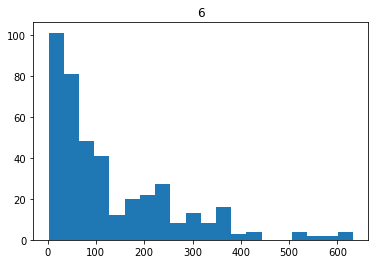

In [123]:
h = 6
i = np.arange(4*h+1, 4*h+5)
test = winter.iloc[:, i]

test = test.to_numpy().flatten()
print(len(test))
plt.hist(test, bins=20)
plt.title(h)

In [125]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(test)

In [126]:
# get cumulative probability for values
print('P(x<20): %.3f' % ecdf(20))
print('P(x<40): %.3f' % ecdf(40))
print('P(x<60): %.3f' % ecdf(60))

P(x<20): 0.135
P(x<40): 0.298
P(x<60): 0.421


In [134]:
n_sample = 100
quantile = np.linspace(0, 1, n_sample)
sample = np.zeros_like(quantile)
sample = np.interp(quantile, ecdf.y, ecdf.x)
sample

array([        -inf,   3.        ,   4.4040404 ,   6.        ,
         6.        ,   8.01010101,  10.21212121,  11.        ,
        12.        ,  12.        ,  13.02020202,  16.        ,
        18.        ,  20.        ,  22.        ,  25.        ,
        26.        ,  27.43434343,  28.        ,  28.83838384,
        30.        ,  31.        ,  32.        ,  33.        ,
        33.        ,  35.        ,  36.25252525,  37.        ,
        39.        ,  40.        ,  41.06060606,  43.26262626,
        45.        ,  47.66666667,  49.        ,  50.        ,
        51.        ,  51.47474747,  53.        ,  55.        ,
        57.        ,  57.        ,  61.        ,  63.68686869,
        65.        ,  66.        ,  68.29292929,  70.49494949,
        73.        ,  77.5959596 ,  79.2020202 ,  82.        ,
        83.50505051,  86.70707071,  95.90909091,  97.        ,
       100.        , 102.51515152, 103.        , 106.91919192,
       108.        , 113.32323232, 116.52525253, 120.72

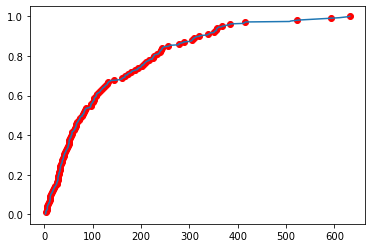

In [135]:
plt.plot(ecdf.x, ecdf.y)
plt.scatter(sample, quantile, c='r')
plt.show()